In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataframe = pd.read_csv("arizona_all_details_users_49k_open_businesses.csv")

In [1]:
from pyspark.sql import SparkSession
sparksession = SparkSession.builder.master("local[*]").appName("100 users").getOrCreate()
sc = sparksession.sparkContext

ImportError: No module named py4j.protocol

In [15]:
dataframe.columns

Index(['Unnamed: 0', 'user_id', 'business_reviewed_count', 'average_stars',
       'compliment_cool', 'compliment_cute', 'compliment_funny',
       'compliment_hot', 'compliment_list', 'compliment_more',
       'compliment_note', 'compliment_photos', 'compliment_plain',
       'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans',
       'funny', 'name', 'review_count', 'useful', 'yelping_since',
       'business_id', 'categories', 'city', 'latitude', 'longitude',
       'business_name', 'postal_code', 'business_review_count',
       'business_stars', 'reviews_cool', 'date', 'reviews_funny', 'review_id',
       'reviews_star', 'reviews_useful'],
      dtype='object')

In [6]:
unique_businesses = dataframe.business_id.unique()

In [26]:
userdataframe = dataframe[['user_id','business_reviewed_count', 'average_stars', 'compliment_cool' ,'compliment_cute' , 'compliment_funny', 'compliment_hot', 'compliment_list','compliment_more','compliment_note','compliment_photos','compliment_plain','compliment_profile','compliment_writer']].size().reset_index().rename(columns={0:'count'})

TypeError: 'numpy.int64' object is not callable

In [9]:
pd.unique(dataframe[['business_id','categories', 'city', 'latitude' ,'longitude' , 'business_name', 'postal_code', 'business_review_count','business_stars']].values().reval())

TypeError: 'numpy.ndarray' object is not callable

In [17]:
business_in_arizona_df =dataframe.groupby(['business_id','categories', 'city', 'latitude' ,'longitude' , 'business_name', 'postal_code', 'business_review_count','business_stars']).size().reset_index().rename(columns={0:'count'})

In [ ]:
business_in_arizona_df =dataframe.groupby(['business_id','categories', 'city', 'latitude' ,'longitude' , 'business_name', 'postal_code', 'business_review_count','business_stars']).size().reset_index().rename(columns={0:'count'})

In [23]:
len(business_in_arizona_df.categories.unique())

27971

In [32]:
import collections
import scipy.sparse as sp
def taglist_to_matrix(taglist):
    """
    This function
    Args:
        taglist: list of list of tags. For example, each element of the list is the list of tags of a business category:
        [u'Doctors', u'Health & Medical']
    Returns:
        A sparse matrix num_docs x tags where element i, j has the counts of how many time tag j appear in document i
    """

    all_tags = [w for doc in taglist for w in doc]
    counter = collections.Counter(all_tags)
    count_pairs = sorted(counter.items(), key=lambda x: -x[1])
    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))
    # sparse matrix indices
    i_indices = [doc_idx for doc_idx in range(len(taglist)) for _ in taglist[doc_idx]]
    j_indices = [word_to_id[w] for doc_idx in range(len(taglist)) for w in taglist[doc_idx]]
    data = [1]*len(all_tags)
    m = sp.csc_matrix((data, (i_indices, j_indices)))
    m.sum_duplicates()
    return m


In [33]:
tags = business_in_arizona_df.categories.tolist()
tag_countmatrix = taglist_to_matrix(tags)

In [35]:
business ={}

In [36]:
km = KMeans(n_clusters=3)
km.fit(tag_countmatrix)
business['cluster'] = km.predict(tag_countmatrix)

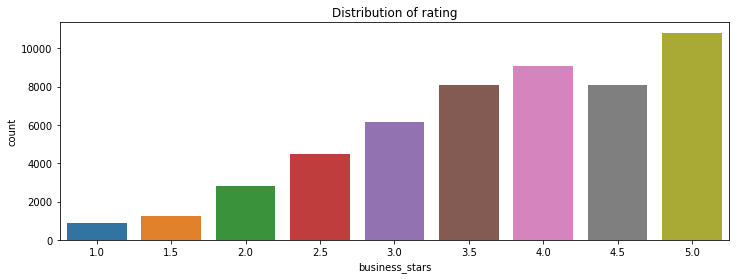

In [24]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business_in_arizona_df['business_stars'])
plt.title('Distribution of rating');

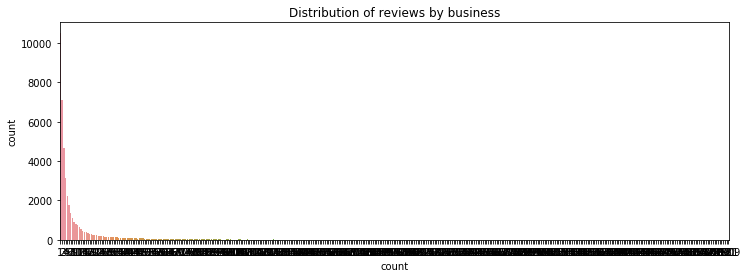

In [43]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business_in_arizona_df['count'])
plt.title('Distribution of reviews by business');

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business_in_arizona_df['count'])
plt.title('Distribution of reviews by business');

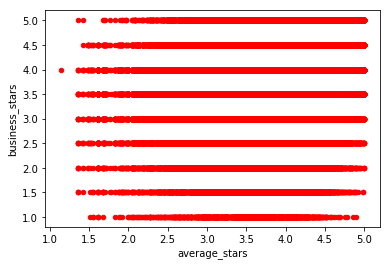

In [4]:
dataframe.plot(kind='scatter',x='average_stars',y='business_stars',color='red')

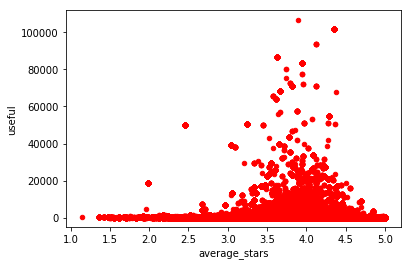

In [7]:
dataframe.plot(kind='scatter',x='average_stars',y='useful',color='red')

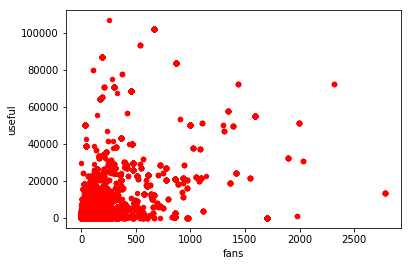

In [9]:
dataframe.plot(kind='scatter',x='fans',y='useful',color='red')

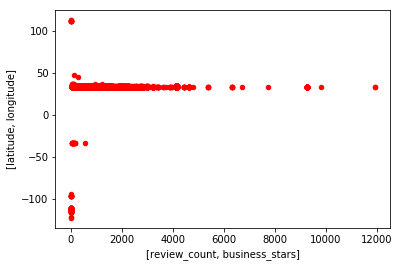

In [13]:
dataframe.plot(kind='scatter',x=['review_count','business_stars'],y=['latitude', 'longitude'],color='red')

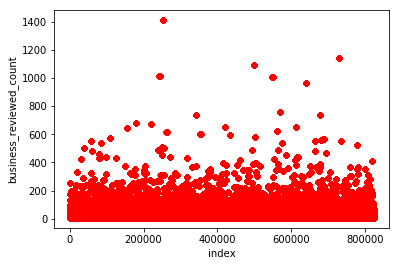

In [7]:
dataframe.reset_index().plot(kind='scatter',x='index',y='business_reviewed_count',color='red')



In [23]:
unique_users=dataframe.user_id.unique()

In [38]:
users_300= unique_users[0:300]

In [39]:
userdf_300= dataframe.loc[dataframe['user_id'].isin(users_300)]

In [40]:
len(userdf_300)

5041

In [42]:
len(userdf_300.business_id.unique())

3611

In [56]:
group_by_user  = dataframe.groupby(['user_id'])['business_id'].apply(set).to_frame().reset_index()

In [58]:
group_by_user

,user_id,business_id
0,--2HUmLkcNHZp0xw6AMBPg,"{thLX_k20SPJ0KyusGTBIHw, Iq7NqQD-sESu3vr9iEGuT..."
1,--3WaS23LcIXtxyFULJHTA,"{uVRMYg3XGR9qo4sAeDFJSQ, bwZqlLj8oYaML3ndlybeD..."
2,--Nnm_506G_p8MxAOQna5w,"{3sOS8wKatd_Uoa9VEJHhrw, BQHbrLQVB6l1GqX93JIQ2..."
3,--P-Qvza7AED8gnDrZkMgA,"{k_SfP93Tmlpmx-5OL1JmTg, Fs7UxECjBPrLm8BEaz8sT..."
4,--Rm-VyYWgHA7ZpljAMlvg,"{iLLzOJLU4tPAN9UUHlyZiQ, hRuJImoZk7U4AnIeqZSQm..."
5,--XpHLy__U2RF_dkWCmmjw,"{HI56ArpYEbhEUeRx9Curpw, jyTtTFa169XYSD5KRMQsH..."
6,--eQVss9nAx54FWsZHZgpA,"{cI-LPhamF9LmrIn1pBnINA, FogTa-wmjhVnJCoTiaxvZ..."
7,--fF_pQlaU9sME-HLCoHlQ,"{qRHR2-EE0IhEResRyjjHYA, ysVpMJngZ22fJnKls7YQr..."
8,--plKrUSHcgXBNwsD8ay1g,"{93FNDjCBsdbKkUoh3UVS4g, JzOp695tclcNCNMuBl7ox..."
9,--s9CO9UcNLd7yrVBjr97Q,"{J07TDs6qnTIaxm48EL1cKQ, n2tiSHECXkFv47aIkxvSD..."


In [65]:
columns =['user1', 'user2' ,'jaccard']
user1_user2_jaccard =pd.DataFrame(columns=columns)  

In [69]:
for id,user1 in group_by_user.iterrows():
    for id2,user2 in group_by_user.iterrows():
        if user1.user_id==user2.user_id:
            continue
        jaccard = len(user1.business_id & user2.business_id)
        jaccard/= len(user1.business_id | user2.business_id)
        user1_user2_jaccard = user1_user2_jaccard.append({'user1': user1.user_id, 'user2' :user2.user_id, 'jaccard' :jaccard}, ignore_index=True)
        
        
        

KeyboardInterrupt: 

In [ ]:
user1_user2_jaccard